### Quick preview and saving of the mapping at selected time steps

In [7]:
import netCDF4
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import numpy as np
import math
import csv
import os
from tqdm import tqdm_notebook as tqdm
from keras_tqdm import TQDMNotebookCallback
from ipywidgets import interactive
from ipywidgets import interact
import ipywidgets as widgets

In [8]:
def get_file_list(data_dir):
    return [os.path.join(data_dir, name) for name in os.listdir(data_dir)]


aq_dir='C:/Users/woshi/Desktop/CE_675_Project/Data/aq_conc/'
emis_dir='C:/Users/woshi/Desktop/CE_675_Project/Data/emis_data/'
met_dir='C:/Users/woshi/Desktop/CE_675_Project/Data/met_data/'

aq_files = get_file_list(aq_dir)
emis_files = get_file_list(emis_dir)
met_files = get_file_list(met_dir)

In [127]:
def plot_aq(day_of_yr, hr_of_day):
    aq_data = netCDF4.Dataset(aq_files[day_of_yr-1]) # minus one because of referring to indices of the file list
    emis_data = netCDF4.Dataset(emis_files[day_of_yr-1])
    met_data = netCDF4.Dataset(met_files[day_of_yr-1])
    O3 = emis_data.variables['VOC_BEIS'][:]
    NO = emis_data.variables['NO'][:]
    
    o3ex = O3[hr_of_day-1][0]
    noex = NO[hr_of_day-1][0]

    # set canvas
    fig = plt.figure(figsize=(12,12))
    colors = [(0.33,0.33,0.33)] + [(plt.cm.jet(i)) for i in range(1,256)]
    new_map = matplotlib.colors.LinearSegmentedColormap.from_list('new_map', colors, N=64)
    
    ax = fig.add_subplot(1,1,1)
    i = ax.imshow(1000*o3ex, cmap=new_map, origin='lower',vmin=0, vmax=25, interpolation='bilinear')

    ax.set_title('Timestep '+ str(hr_of_day), fontsize=16)
    ax.set_ylabel('Y_Grid', fontsize=14)
    ax.set_xlabel('X_Grid', fontsize=14)
    ax.tick_params('both', labelsize=14)

    fig.savefig('C:/Users/woshi/Desktop/'+'VOC'+str(day_of_yr)+'.'+str(hr_of_day)+'.png', format='png', transparent=True)

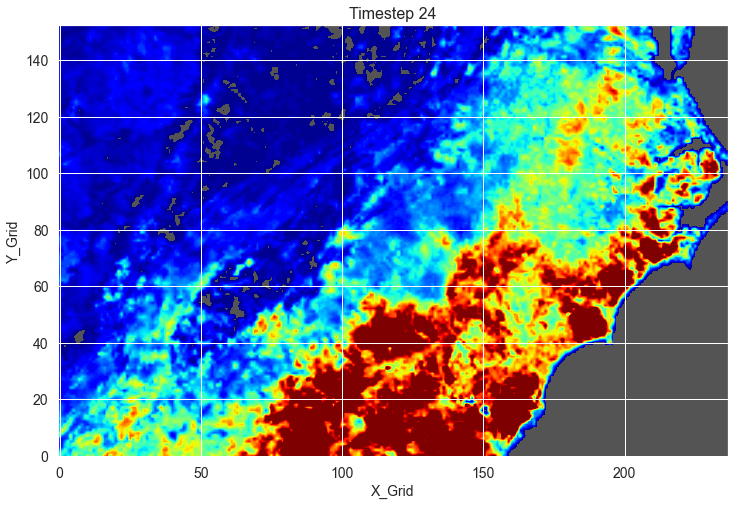

In [128]:
plot_aq(1,24)